# **NONLINEAR ANALYSIS OF A SHALLOW TRUSS**
***

In [191]:
from numpy import sqrt
from scipy.optimize import newton, minimize
import matplotlib.pyplot as plt

In [192]:
# Units are understood in [kN] and [m]
b = 10.  # half of the total width of the structure in [m]
h = 0.5  # initial height of the structure in [m]
EA = 5000.  # <Young's modulus> * <Cross sectional area> in [kN/m2]
k = 1.0  # spring stiffness [kN/m]
F = 1.5  # applied load in [kN]
v = 0.  # initial guess of the displacement in [m]

In [193]:
def R(F):
    """
    Returns the residual for a candidate solution. 
    Optimal for a force-controlled scenario.
    """
    l0 = sqrt(h**2 + b**2)
    def inner(v):
        l = sqrt((h-v)**2 + b**2)
        return F - k*v + EA*((l-l0)/l0)*((h-v)/l0)
    return inner

In [194]:
# solution by findig roots of a nonlinear function
residual = R(F)
v = newton(residual, 0)
print("A result of F = {} [kN] is the displacement v = {} [m].".format(F, v))

A result of F = 1.5 [kN] is the displacement v = 1.1695310638900063 [m].


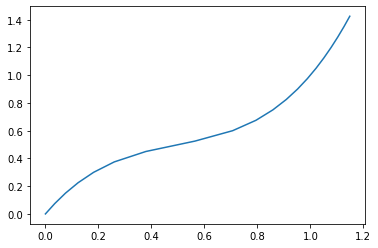

In [195]:
#k = 0.
nstep = 20
ydata = [i*F/nstep for i in range(nstep)]
xdata = []
v = 0
for Fi in ydata:
    v = newton(R(Fi), v)
    xdata.append(v)
plt.plot(xdata, ydata);

In [196]:
def Q(v):
    """
    Returns the residual for a candidate solution. 
    Optimal for a displacement-controlled scenario.
    """
    l0 = sqrt(h**2 + b**2)
    def inner(F):
        l = sqrt((h-v)**2 + b**2)
        return F - k*v + EA*((l-l0)/l0)*((h-v)/l0)
    return inner

In [197]:
# solution by findig roots of a nonlinear function
residual = Q(v)
F0 = 0  # initial solution
F = newton(residual, F0)
print("The reason of displacement v = {} [m] is the force F = {} [kN].".format(v, F))

The reason of displacement v = 1.1488247530588318 [m] is the force F = 1.4249999999999738 [kN].


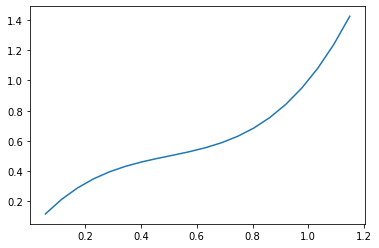

In [198]:
#k = 0.
nstep = 20
xdata = [(i+1)*v/nstep for i in range(nstep)]
ydata = []
F = 0
for vi in xdata:
    F = newton(Q(vi), F)
    ydata.append(F)
plt.plot(xdata, ydata);

In [199]:
residual = R(F)
error = lambda x : residual(x[0])**2

In [200]:
# solution by minimizing an error measure
v = minimize(error, [0], method='Nelder-Mead', tol=1e-8).x[0]
print("A result of F = {} [kN] is the displacement v = {} [m].".format(F, v))

A result of F = 1.4249999999999736 [kN] is the displacement v = 1.1488247528076183 [m].


In [201]:
def TPE(F):
    """
    Returns the residual for a candidate solution. 
    Optimal for a force-controlled scenario.
    """
    l0 = sqrt(h**2 + b**2)
    K = EA / l0
    def inner(v):
        # v is expected as an iterable
        l = sqrt((h-v[0])**2 + b**2)
        return K*(l-l0)**2 + k*v[0]**2 - 2*F*v[0]
    return inner

In [202]:
# solution by minimizing an error measure
v = minimize(TPE(F), [0], method='Nelder-Mead', tol=1e-8).x[0]
print("A result of F = {} [kN] is the displacement v = {} [m].".format(F, v))

A result of F = 1.4249999999999736 [kN] is the displacement v = 1.1488916473388684 [m].


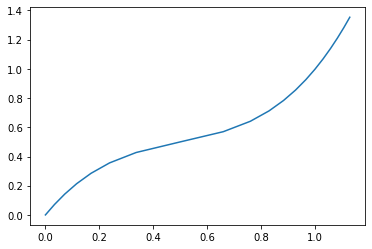

In [203]:
#k = 0.
nstep = 20
ydata = [i*F/nstep for i in range(nstep)]
xdata = []
v = 0
for Fi in ydata:
    v = minimize(TPE(Fi), [v], method='Nelder-Mead', tol=1e-8).x[0]
    xdata.append(v)
plt.plot(xdata, ydata);